# Cross validation

Cross validation using scikit learn and california housing dataset

Loosely based on - <https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
calihouses = fetch_california_housing()
calidata = calihouses.data
header = calihouses.feature_names

df = pd.DataFrame(calidata, columns=header)
display(df.shape)
df

(20640, 8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
print(calihouses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Holdout validation

* split the data into training and testing set


In [34]:

y = calihouses.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14448, 8) (14448,)
(6192, 8) (6192,)


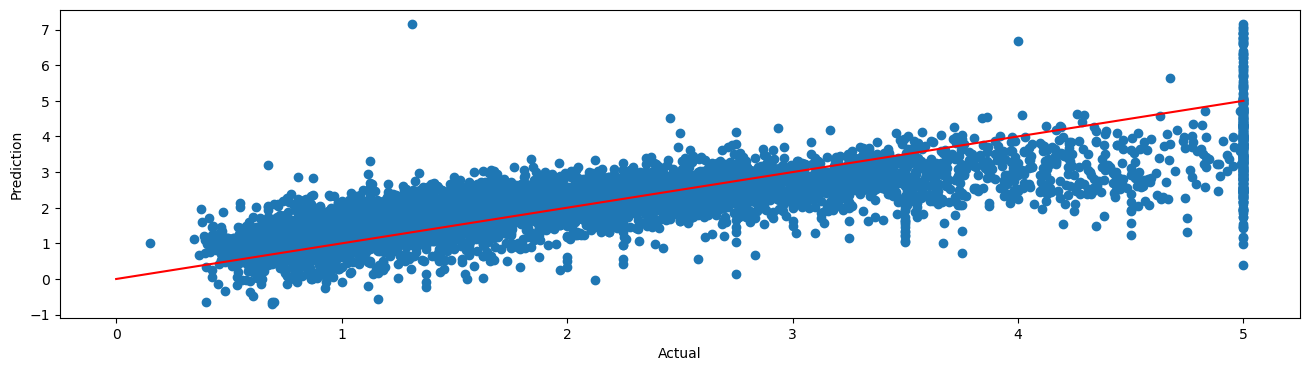

CPU times: user 467 ms, sys: 186 ms, total: 653 ms
Wall time: 165 ms


In [35]:
%%time

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(16, 4))
plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Prediction")
# put a line in the chart that shows actual value i.e. predictions = test_y
plt.plot(np.linspace(0,5,100), np.linspace(0, 5, 100), color="r")
plt.show()


In [36]:
np.sqrt(mean_squared_error(y_test, predictions))

0.7249789822808642